# Project Overview

Introduction:
The project is Twitter Sentiment Analysis. This context is taken from real task of text processing.

Basicaly task is to build a model that will determine the tone(neutral,positive, negative) of the text.To do this task, we need to train the model on the train data.

# Import Necessary Libraries

In [1]:
! pip install pandas

! pip install nltk

! pip install scikit-learn

! pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sukanyasemwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sukanyasemwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sukanyasemwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load the dataset

df = pd.read_csv('train.twitter.csv', encoding = 'latin1')
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [4]:
texts = df['SentimentText']
labels = df['Sentiment']
print(texts)
print(labels)

0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
                               ...                        
99984    @Cupcake  seems like a repeating problem   hop...
99985    @cupcake__ arrrr we both replied to each other...
99986                       @CuPcAkE_2120 ya i thought so 
99987    @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988                      @cupcake_kayla haha yes you do 
Name: SentimentText, Length: 99989, dtype: object
0        0
1        0
2        1
3        0
4        0
        ..
99984    0
99985    1
99986    0
99987    1
99988    1
Name: Sentiment, Length: 99989, dtype: int64


In [5]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
df.tail()

,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [7]:
# Check if any null values present
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

# Preprocess the Text Data

In [8]:
# Define sentiment label mapping
# 0: Negative
# 1: Positive

def preprocess_text(text):
    # Preprocessing steps
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [9]:
preprocessed_texts = texts.apply(preprocess_text)

for text, preprocessed_text in zip(texts, preprocessed_texts):
    print('Original text:', text)
    print('Preprocessed text:', preprocessed_text)
    print()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# EDA

Number of samples: 99989


<Axes: xlabel='Sentiment'>

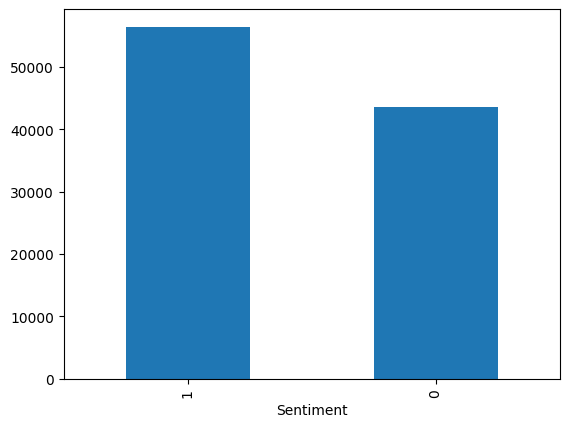

In [10]:
# Visualize Class distribution

print('Number of samples:', len(texts))

df['Sentiment'].value_counts().plot(kind='bar')

Here we can see the count of positive sentiments are more than negative.

In [11]:
# Let's categorize sentiments into tones
tones = []
for label in labels:
    if label == 0:
        tones.append('negative')
    elif label == 1:
        tones.append('positive')
    else:
        tones.append('neutral')
print(tones)        

['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'ne

In [12]:
# Split the data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(preprocessed_texts, tones, test_size = 0.2, random_state = 42)

In [13]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Generate TF-IDF features for the training and testing sets
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [14]:
import pickle

# Save this for future use
with open('vectorizer.pkl', 'wb')as file:
    pickle.dump(vectorizer, file)

In [15]:
# Train a model
classifier = SVC()
classifier.fit(X_train_vectors, y_train)

SVC()

In [16]:
# Make predictions and evaluate the model
y_pred = classifier.predict(X_test_vectors)

# Evaluate the model
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Classification report:\n", report)
print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_matrix)

Classification report:
               precision    recall  f1-score   support

    negative       0.76      0.67      0.71      8750
    positive       0.77      0.83      0.80     11248

    accuracy                           0.76     19998
   macro avg       0.76      0.75      0.75     19998
weighted avg       0.76      0.76      0.76     19998

Accuracy: 0.7623762376237624
Confusion matrix:


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the classifier and parameter grid
classifier = SVC()
params_grid = {'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

# perform grid search
grid_search = GridSearchCV(classifier, params_grid, cv = 5)
grid_search.fit(X_train_vectors, y_train)

# Get best parameter and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_classifier = SVC()
best_classifier.fit(X_train_vectors, y_train)

# calculate n print accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7623762376237624


# Save the model

In [23]:
with open('sentiment_analysis.pickle', 'wb') as f:
    pickle.dump(classifier, f)

# Prediction on Unseen data

In [24]:
# Load Saved model and vectors
with open('sentiment_analysis.pickle', 'rb') as f:
    classifier = pickle.load(f)
    
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

In [25]:
# load unseen dataset

df1 = pd.read_csv('test.twitter.csv', encoding = 'latin1')
df1

,ItemID,SentimentText
0,1,is so sad for my APL frie...
1,2,I missed the New Moon trail...
2,3,omg its already 7:30 :O
3,4,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,i think mi bf is cheating on me!!! ...
...,...,...
299984,299996,"@martine2323 'Morning, Petal - work brought me..."
299985,299997,"@martinetrene Hello,little bird! i finally st..."
299986,299998,@MartinezMayra I got u at work when I go buy o...
299987,299999,@martinfaux He certainly gives good interview


In [26]:
# Preprocess the new text
new_texts = df1['SentimentText']
preprocessed_new_texts = [preprocess_text(text) for text in new_texts]
new_text_vectors = vectorizer.transform(preprocessed_new_texts)

In [29]:
# Train the model with the best parameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train_vectors, y_train)

# Make prediction on new text
predicted_tones = best_classifier.predict(new_text_vectors)

In [30]:
# Add predicted tones on new df
df1['predicted_tones'] = predicted_tones

# Print new df
print(df1)

        ItemID                                      SentimentText  \
0            1                       is so sad for my APL frie...   
1            2                     I missed the New Moon trail...   
2            3                            omg its already 7:30 :O   
3            4            .. Omgaga. Im sooo  im gunna CRy. I'...   
4            5           i think mi bf is cheating on me!!!   ...   
...        ...                                                ...   
299984  299996  @martine2323 'Morning, Petal - work brought me...   
299985  299997  @martinetrene Hello,little bird!  i finally st...   
299986  299998  @MartinezMayra I got u at work when I go buy o...   
299987  299999     @martinfaux He certainly gives good interview    
299988  300000  @martinfaux we've the feedback about our brows...   

       predicted_tones  
0             negative  
1             negative  
2             negative  
3             negative  
4             negative  
...                ..